<a href="https://colab.research.google.com/github/spoorthi0802/Machinelearning/blob/main/ML_LAB7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv("drive/My Drive/code_ques.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,score
0,-1.355365,2.348287,1.030452,-1.503548,-0.380958,1.095197,-2.063201,-1.657276,0.780015,0.224140,...,-2.330601,0.542652,-1.660974,-2.150713,0.545611,-1.614411,-0.133085,-2.134145,1.184289,10.0
1,-1.403411,2.131454,1.117223,-1.542901,-0.351417,1.042730,-2.025140,-1.812830,0.707280,0.165037,...,-2.183963,0.488854,-1.674375,-2.027182,0.514854,-1.625416,0.014533,-2.156347,1.088794,8.0
2,-1.388594,2.358305,0.994477,-1.480365,-0.382565,1.104627,-2.042682,-1.669257,0.800453,0.265268,...,-2.347989,0.555944,-1.651969,-2.149015,0.582454,-1.606852,-0.164269,-2.139201,1.158317,7.0
3,-1.352139,2.155489,1.027737,-1.424550,-0.316464,1.111701,-2.039937,-1.789147,0.725883,0.298638,...,-2.216481,0.487809,-1.595799,-2.143987,0.419316,-1.635483,-0.074271,-2.112344,1.094625,5.0
4,-1.411875,2.337363,1.050743,-1.506995,-0.321872,1.118751,-2.068671,-1.603735,0.730069,0.242844,...,-2.279187,0.451709,-1.607142,-2.184134,0.521283,-1.604708,-0.055002,-2.056900,1.290956,6.0


In [5]:
for col in df.columns:
  if df[col].isnull().sum()>0:
    print(col)
    print(df[col].isnull().sum())

score
4


In [6]:
df.dropna(inplace=True)

In [7]:
df['Final_score'] = np.where(df['score'] > 5, 1, 0)

In [8]:
df.shape
df.dtypes

0              float64
1              float64
2              float64
3              float64
4              float64
                ...   
765            float64
766            float64
767            float64
score          float64
Final_score      int64
Length: 770, dtype: object

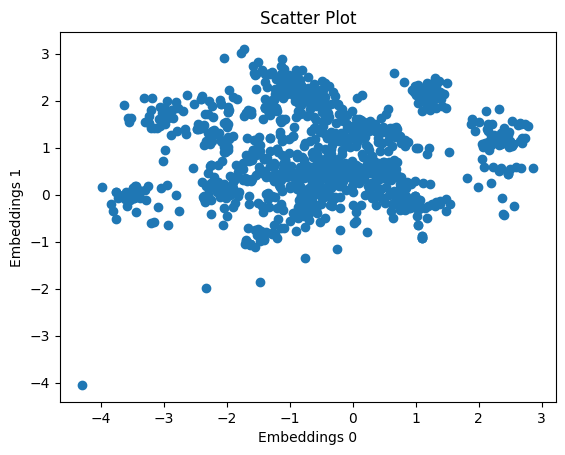

In [12]:
vector1 = df['1'].to_numpy()
vector2 = df['5'].to_numpy()

plt.scatter(vector1,vector2)
plt.title("Scatter Plot")
plt.xlabel("Embeddings 0")
plt.ylabel("Embeddings 1")
plt.show()

In [15]:
model = LinearRegression()
X = df[['1']]  # Independent variable
y = df['score']  # Dependent variable
model.fit(X, y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 10.747590793555236


In [16]:
# Split the data into features (X) and the target variable (y)
X = df.drop(['score','Final_score'], axis=1)  # Assuming 'embed_0' and 'embed_1' are your target variables
y_column1 = df['score']
y_column2 = df['Final_score']

# Splitting the data into training and test sets
X_train, X_test, y_train_column1, y_test_column1, y_train_column2, y_test_column2 = train_test_split(X, y_column1, y_column2, test_size=0.2, random_state=42)

# Create a Decision Tree Regressor for 'embed_0'
regressor_column1 = DecisionTreeRegressor()
regressor_column1.fit(X_train, y_train_column1)
y_pred_column1 = regressor_column1.predict(X_test)

# Calculate the Mean Squared Error for 'embed_0'
mse_column1 = mean_squared_error(y_test_column1, y_pred_column1)
print("Mean Squared Error (score):", mse_column1)

# Create a Decision Tree Regressor for 'embed_1'
regressor_column2 = DecisionTreeRegressor()
regressor_column2.fit(X_train, y_train_column2)
y_pred_column2 = regressor_column2.predict(X_test)

# Calculate the Mean Squared Error for 'embed_1'
mse_column2 = mean_squared_error(y_test_column2, y_pred_column2)
print("Mean Squared Error (Final score):", mse_column2)

Mean Squared Error (score): 5.705975833990019
Mean Squared Error (Final score): 0.321578670869451


In [18]:
knn_regressor_column1 = KNeighborsRegressor(n_neighbors=5)
knn_regressor_column1.fit(X_train, y_train_column1)
y_pred_column1 = knn_regressor_column1.predict(X_test)

# Calculate the Mean Squared Error for 'embed_0'
mse_column1 = mean_squared_error(y_test_column1, y_pred_column1)
print("Mean Squared Error (score):", mse_column1)

# Create a k-NN Regressor for 'embed_1'
knn_regressor_column2 = KNeighborsRegressor(n_neighbors=5)
knn_regressor_column2.fit(X_train, y_train_column2)
y_pred_column2 = knn_regressor_column2.predict(X_test)

# Calculate the Mean Squared Error for 'embed_1'
mse_column2 = mean_squared_error(y_test_column2, y_pred_column2)
print("Mean Squared Error (final score):", mse_column2)

Mean Squared Error (score): 3.9552340425531916
Mean Squared Error (final score): 0.18178723404255318
